<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-2: PREPROCESSING TECHNIQUES FOR NEURAL NETWORKS

## Name: SK SHAKEEL AKHTAR
## Reg. No.: 2341001063
## Section: 23412C3


# 1.Preprocessing
* Load the dataset and split it into training (80%) and testing (20%) sets.
* Standardize the features using StandardScaler.
* Perform exploratory data analysis (EDA): Plot feature distributions, correlations, or class distributions.

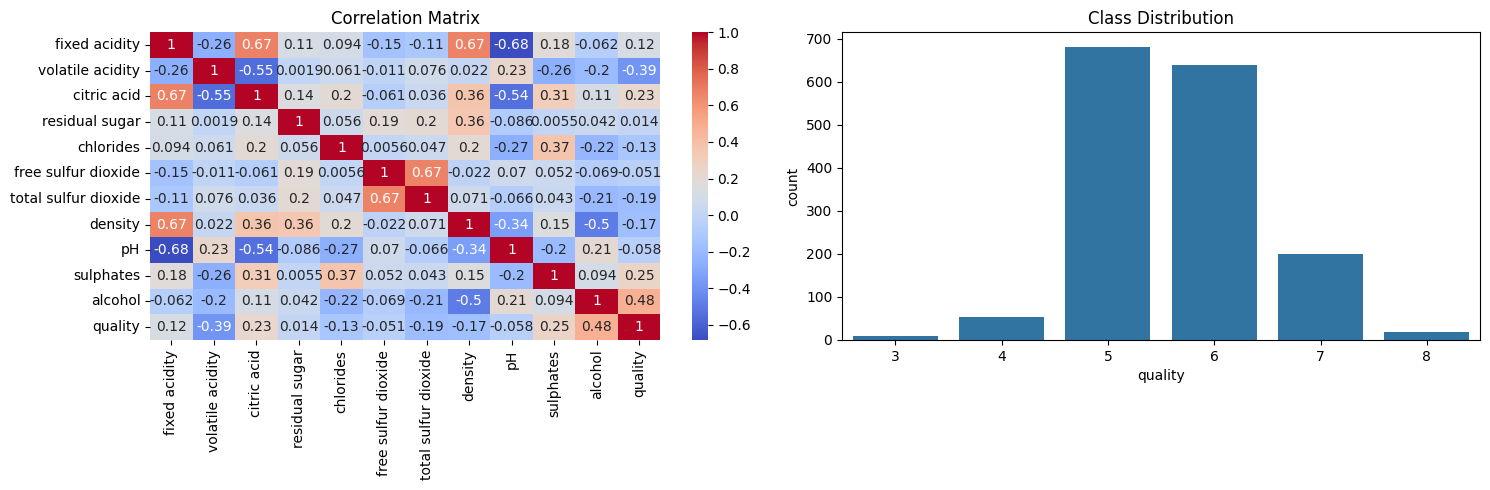

In [1]:
#loading the data
import pandas as pd
df = pd.read_csv('winequality-red.csv', delimiter=';')

#Trainig(80%)and testing(20%)sets
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (EDA): Plot feature distributions, correlations, or class distributions.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize for larger plots
import matplotlib.pyplot as plt
import seaborn as sns

# Correlations Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0]) #Specify the axes
axes[0].set_title('Correlation Matrix')

# Class Distribution
sns.countplot(x='quality', data=df, ax=axes[1]) #Specify the axes
axes[1].set_title('Class Distribution')

plt.tight_layout() #Adjust layout to prevent overlapping
plt.show()



In [2]:
#Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#2. Build and Train an MLP Classifier
* Use tensorflow to create a multi layered fully connected model with default parameters.
* Try with different combination of neurons in layers to achieve the best performance.


In [3]:
# Try with different combination of neurons in layers to achieve the best performance.
# Define a function to create and train models with different architectures

# Create the MLP Model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l1,l2

reg =l1(0.1)
model = Sequential()
model.add(Input(shape = (X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(.2))
model.add(BatchNormalization())
# Get the number of unique classes in y_train
num_classes = len(y_train.unique())
# or num_classes = y_train.nunique() # Alternative way using pandas method
model.add(Dense(num_classes, activation='softmax')) # Output layer with num_classes neurons

# Train and evaluate each architecture
best_model = None
best_loss = float('inf')



In [4]:
#Try with different combination of neurons in layers to achieve the best performance.
from sklearn.preprocessing import LabelEncoder

def create_and_train_model(neurons_per_layer):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for neurons in neurons_per_layer:
        model.add(Dense(neurons, activation='relu'))
        # Consider adding regularization or dropout if needed
        # model.add(Dropout(0.2))  # Example dropout
        model.add(BatchNormalization())
    num_classes = len(y_train.unique())
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define different architectures to try
architectures = [
    [32, 64, 128],  # Original architecture
    [64, 128, 256],
    [16, 32, 64],
    [128, 64, 32],  # Reversed architecture
    [32, 32, 32],  # Same neurons
    [64, 64], # Fewer layers
    [64, 128, 256, 512] # More layers
]

best_model = None
best_loss = float('inf')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Transform y_test using the same encoder


for neurons_per_layer in architectures:
    model = create_and_train_model(neurons_per_layer)
    history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, verbose=0, validation_split=0.2) # Reduced epochs for demonstration, using encoded y_train
    loss = history.history['val_loss'][-1]

    print(f"Architecture: {neurons_per_layer}, Validation Loss: {loss}")

    if loss < best_loss:
        best_loss = loss
        best_model = model
        print(f"New best model found with loss: {best_loss}")

# Evaluate the best model using encoded y_test
_, accuracy = best_model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Best Model Accuracy on test set: {accuracy}")

Architecture: [32, 64, 128], Validation Loss: 1.0064178705215454
New best model found with loss: 1.0064178705215454
Architecture: [64, 128, 256], Validation Loss: 1.376298427581787
Architecture: [16, 32, 64], Validation Loss: 0.8677647709846497
New best model found with loss: 0.8677647709846497
Architecture: [128, 64, 32], Validation Loss: 1.034895420074463
Architecture: [32, 32, 32], Validation Loss: 0.9373928904533386
Architecture: [64, 64], Validation Loss: 0.9358961582183838
Architecture: [64, 128, 256, 512], Validation Loss: 1.7498197555541992
Best Model Accuracy on test set: 0.6000000238418579


# Evaluate the Model
* Compute accuracy, precision, recall, and F1-score on the test set.
* 2. Plot the loss and accuracy vs. epochs to check for convergence.
* 3. Generate a confusion matrix and analyse misclassifications.
* 4. Compare training vs. testing accuracy to detect overfitting/underfitting.
* 5. Identify the different aspects of the model which can be modified to extract the best performance.

In [5]:
# 1. Compute accuracy, precision, recall, and F1-score on the test set.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Predict on the test set
y_pred_encoded = best_model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1)) # Decode predictions

# 1. Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Accuracy: 0.6
Precision: 0.5718386592096186
Recall: 0.6
F1-score: 0.5839183731885185


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


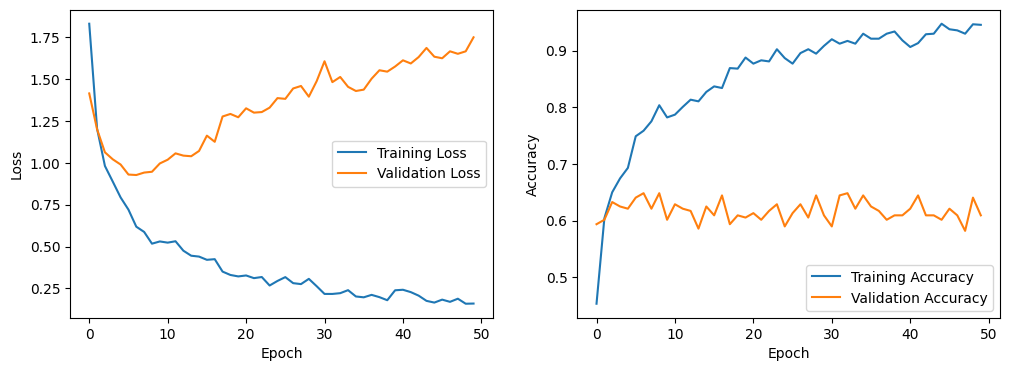

In [6]:
# 2. Plot the loss and accuracy vs. epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

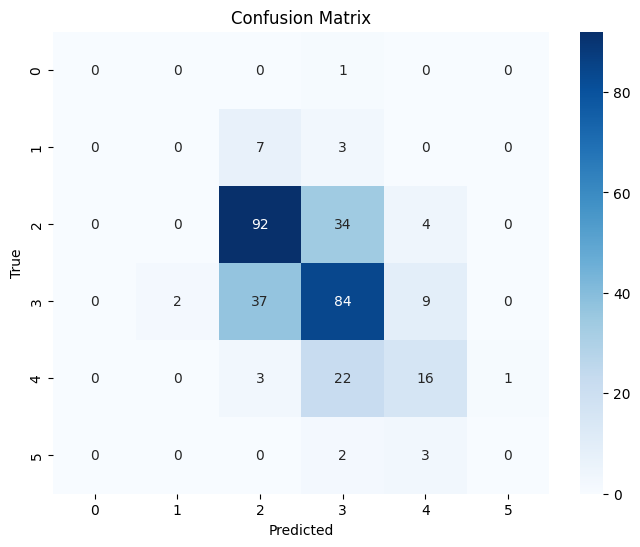

In [7]:
# 3. Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# 4. Compare training vs. testing accuracy
training_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {accuracy}")


# 5. Identify aspects to modify
print("\nModel Improvement Suggestions:")
print("1. **Hyperparameter Tuning:** Experiment with different optimizers (e.g., RMSprop, SGD), learning rates, batch sizes, and regularization strengths (L1, L2) using techniques like GridSearchCV or RandomizedSearchCV.")
print("2. **Network Architecture:** Try different numbers of layers, neurons per layer, and activation functions.  Consider adding or removing dropout or batch normalization layers.")
print("3. **Data Augmentation:** If applicable to your dataset, explore data augmentation techniques to artificially expand your training set, which can improve generalization.")
print("4. **Feature Engineering:** Explore new features or transformations of existing features.  Examine feature importance from the model to identify potentially irrelevant or redundant features.")
print("5. **Early Stopping:** Implement early stopping to prevent overfitting. Monitor validation loss and stop training when it starts to increase.")
print("6. **Class Imbalance Handling:**  If classes are imbalanced, consider techniques like oversampling the minority class, undersampling the majority class, or using weighted loss functions.")

Training Accuracy: 0.9452590346336365
Testing Accuracy: 0.6

Model Improvement Suggestions:
1. **Hyperparameter Tuning:** Experiment with different optimizers (e.g., RMSprop, SGD), learning rates, batch sizes, and regularization strengths (L1, L2) using techniques like GridSearchCV or RandomizedSearchCV.
2. **Network Architecture:** Try different numbers of layers, neurons per layer, and activation functions.  Consider adding or removing dropout or batch normalization layers.
3. **Data Augmentation:** If applicable to your dataset, explore data augmentation techniques to artificially expand your training set, which can improve generalization.
4. **Feature Engineering:** Explore new features or transformations of existing features.  Examine feature importance from the model to identify potentially irrelevant or redundant features.
5. **Early Stopping:** Implement early stopping to prevent overfitting. Monitor validation loss and stop training when it starts to increase.
6. **Class Imbal